In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv('../data/worldcities_dataset.csv')
print(df.head())
print(df.info())

        city city_ascii      lat       lng    country iso2 iso3   admin_name  \
0      Tokyo      Tokyo  35.6870  139.7495      Japan   JP  JPN        Tōkyō   
1    Jakarta    Jakarta  -6.1750  106.8275  Indonesia   ID  IDN      Jakarta   
2      Delhi      Delhi  28.6100   77.2300      India   IN  IND        Delhi   
3  Guangzhou  Guangzhou  23.1300  113.2600      China   CN  CHN    Guangdong   
4     Mumbai     Mumbai  19.0761   72.8775      India   IN  IND  Mahārāshtra   

   capital  population          id  
0  primary  37785000.0  1392685764  
1  primary  33756000.0  1360771077  
2    admin  32226000.0  1356872604  
3    admin  26940000.0  1156237133  
4    admin  24973000.0  1356226629  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48059 entries, 0 to 48058
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        48059 non-null  object 
 1   city_ascii  48057 non-null  object 
 2   lat         48059 n

In [50]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 city              0
city_ascii        2
lat               0
lng               0
country           0
iso2             33
iso3              0
admin_name      201
capital       32921
population      251
id                0
dtype: int64


In [51]:
df["city_ascii"] = df["city_ascii"].fillna(df["city"])

In [52]:
df["iso2"] = df.groupby("country")["iso2"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

In [53]:
df["admin_name"] = df.groupby("country")["admin_name"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

In [54]:
df["capital"] = df["capital"].fillna("No")

In [55]:
df["population"] = df.groupby("country")["population"].transform(lambda x: x.fillna(x.mean()))

In [56]:
#number of cities available for each country.
city_count_by_country = df["country"].value_counts()
print(city_count_by_country)

country
India                                       7108
United States                               5344
Brazil                                      2961
Germany                                     1759
China                                       1732
                                            ... 
Norfolk Island                                 1
South Georgia and South Sandwich Islands       1
Pitcairn Islands                               1
South Georgia And South Sandwich Islands       1
U.S. Virgin Islands                            1
Name: count, Length: 242, dtype: int64


In [57]:
#average population per country.
avg_pop_by_country = df.groupby("country")["population"].mean()
print(avg_pop_by_country)


country
Afghanistan          164607.463768
Albania               39727.605263
Algeria               43318.992767
American Samoa        12576.000000
Andorra               13168.500000
                         ...      
Wallis and Futuna       675.500000
West Bank             47837.777778
Yemen                153569.755556
Zambia               152265.390244
Zimbabwe             118314.605263
Name: population, Length: 242, dtype: float64


In [58]:
#the top 20 cities with the highest population.
top_cities_by_pop = df.nlargest(20, "population")[["city", "population"]]
print(top_cities_by_pop)

            city  population
0          Tokyo  37785000.0
1        Jakarta  33756000.0
2          Delhi  32226000.0
3      Guangzhou  26940000.0
4         Mumbai  24973000.0
5         Manila  24922000.0
6       Shanghai  24073000.0
7      São Paulo  23086000.0
8          Seoul  23016000.0
9    Mexico City  21804000.0
10       Kolkāta  21747000.0
11         Cairo  20296000.0
12       Karachi  20249000.0
13         Dhaka  19134000.0
14      New York  18832416.0
15       Beijing  18522000.0
16       Bangkok  18007000.0
17      Shenzhen  17619000.0
18        Moscow  17332000.0
19  Buenos Aires  16710000.0


In [59]:
#total number of cities marked as primary capitals.
primary_capitals = len(df[df["capital"] == "primary"])
print(f"Number of Primary Capitals: {primary_capitals}")

Number of Primary Capitals: 251


In [60]:
#average latitude for each country.
avg_lat_by_country = df.groupby("country")["lat"].mean()
print(avg_lat_by_country)

country
Afghanistan          34.669118
Albania              41.092418
Algeria              35.350107
American Samoa      -14.274000
Andorra              42.522013
                       ...    
Wallis and Futuna   -13.787900
West Bank            31.896089
Yemen                14.473685
Zambia              -13.160968
Zimbabwe            -18.651374
Name: lat, Length: 242, dtype: float64


In [61]:
#total population by continent proxy (assuming country represents continent grouping).
total_pop_by_continent = df.groupby("country")["population"].sum()
print(total_pop_by_continent)

country
Afghanistan          1.168713e+07
Albania              1.509649e+06
Algeria              2.395540e+07
American Samoa       1.257600e+04
Andorra              1.053480e+05
                         ...     
Wallis and Futuna    1.351000e+03
West Bank            8.610800e+05
Yemen                7.217779e+06
Zambia               6.242881e+06
Zimbabwe             4.614270e+06
Name: population, Length: 242, dtype: float64


In [62]:
#minimum longitude (westernmost point) for each country.
min_lng_by_country = df.groupby("country")["lng"].min()
print(min_lng_by_country)

country
Afghanistan           61.0667
Albania               19.4458
Algeria               -8.1286
American Samoa      -170.7046
Andorra                1.4911
                       ...   
Wallis and Futuna   -178.1583
West Bank             34.9706
Yemen                 42.9511
Zambia                22.6789
Zimbabwe              25.8333
Name: lng, Length: 242, dtype: float64


In [63]:
#how many cities exist in each administrative region.
city_count_by_admin = df["admin_name"].value_counts()
print(city_count_by_admin)

admin_name
Bihār             1426
Andhra Pradesh    1064
Tamil Nādu        1061
Kerala             650
California         522
                  ... 
Omoro                1
Kyankwanzi           1
Kween                1
Butebo               1
Kasanda              1
Name: count, Length: 4047, dtype: int64


In [64]:
#average population of cities that are designated as capitals.
avg_pop_capitals = df[df["capital"].isin(["primary", "admin"])]["population"].mean()
print(f"Avg Population of Capitals: {avg_pop_capitals:.2f}")

Avg Population of Capitals: 487302.89


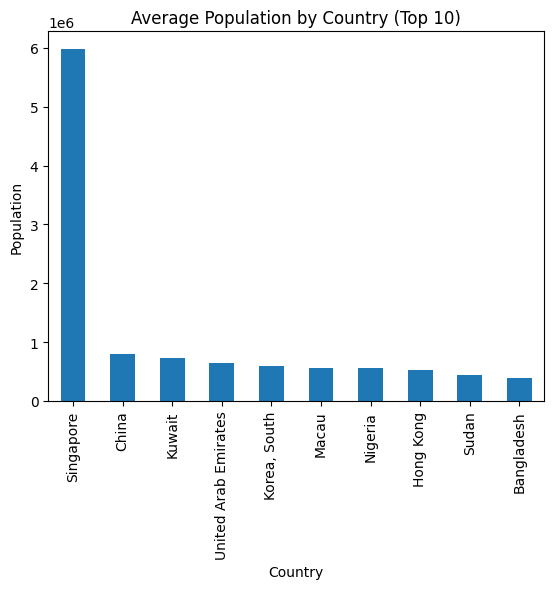

In [65]:
df.groupby("country")["population"].mean().nlargest(10).plot(kind="bar")
plt.title("Average Population by Country (Top 10)")
plt.xlabel("Country")
plt.ylabel("Population")
plt.show()

In [66]:
#maximum latitude value per country.
max_lat_by_country = df.groupby("country")["lat"].max()
print(max_lat_by_country)

country
Afghanistan          37.6167
Albania              42.3583
Algeria              37.0056
American Samoa      -14.2740
Andorra              42.5667
                      ...   
Wallis and Futuna   -13.2825
West Bank            32.4594
Yemen                16.9400
Zambia               -8.8333
Zimbabwe            -16.2000
Name: lat, Length: 242, dtype: float64


In [67]:
#average longitude for each administrative region.
avg_lng_by_admin = df.groupby("admin_name")["lng"].mean()
print(avg_lng_by_admin)

admin_name
Aakkâr           36.177250
Aargau            8.150212
Abay             80.842650
Aberdeen City    -2.142500
Aberdeenshire    -2.098317
                   ...    
‘Ajlūn           35.706800
‘Ajmān           55.445600
‘Amrān           43.980467
‘Anseba          38.458100
‘Asīr            42.372640
Name: lng, Length: 4047, dtype: float64


In [68]:
#how many cities have a population greater than one million.
million_plus_cities = len(df[df["population"] > 1000000])
print(f"Cities with Population > 1M: {million_plus_cities}")

Cities with Population > 1M: 744


In [69]:
#average population grouped by ISO3 code.
avg_pop_by_iso3 = df.groupby("iso3")["population"].mean()
print(avg_pop_by_iso3)

iso3
ABW     25076.500000
AFG    164607.463768
AGO    201302.217105
AIA      3269.000000
ALB     39727.605263
           ...      
XWB     47837.777778
YEM    153569.755556
ZAF    115729.874150
ZMB    152265.390244
ZWE    118314.605263
Name: population, Length: 241, dtype: float64


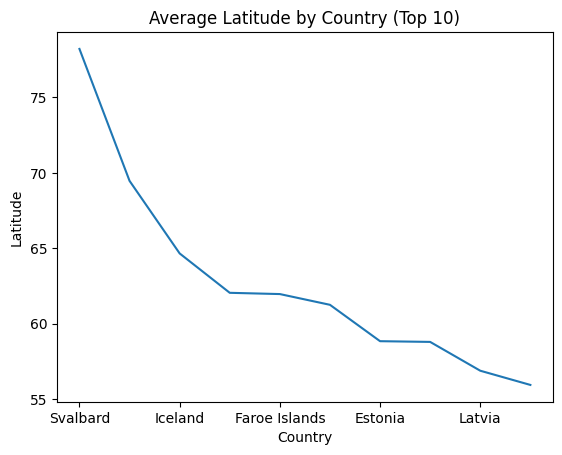

In [70]:
df.groupby("country")["lat"].mean().nlargest(10).plot(kind="line")
plt.title("Average Latitude by Country (Top 10)")
plt.xlabel("Country")
plt.ylabel("Latitude")
plt.show()

In [71]:
#the top 10 countries with the most cities.
top_countries_by_cities = df["country"].value_counts().nlargest(10)
print(top_countries_by_cities)

country
India             7108
United States     5344
Brazil            2961
Germany           1759
China             1732
Philippines       1584
United Kingdom    1365
Italy             1357
Japan             1344
France            1160
Name: count, dtype: int64


In [72]:
#average population of cities that are not capitals.
avg_pop_non_capitals = df[df["capital"] == "No"]["population"].mean()
print(f"Avg Population of Non-Capitals: {avg_pop_non_capitals:.2f}")

Avg Population of Non-Capitals: 59700.82


In [73]:
#total population for each administrative region.
total_pop_by_admin = df.groupby("admin_name")["population"].sum()
print(total_pop_by_admin)

admin_name
Aakkâr            16730.000000
Aargau           233531.000000
Abay             415526.000000
Aberdeen City    209252.000000
Aberdeenshire     73795.000000
                     ...      
‘Ajlūn           157517.000000
‘Ajmān           490035.000000
‘Amrān           186185.755556
‘Anseba          146500.000000
‘Asīr            645003.000000
Name: population, Length: 4047, dtype: float64


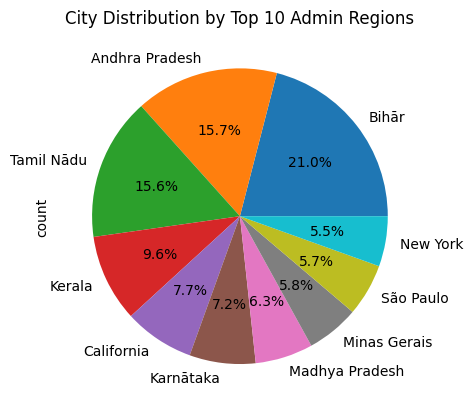

In [74]:
df["admin_name"].value_counts().nlargest(10).plot(kind="pie", autopct='%1.1f%%')
plt.title("City Distribution by Top 10 Admin Regions")
plt.show()

In [75]:
#minimum population for each country.
min_pop_by_country = df.groupby("country")["population"].min()
print(min_pop_by_country)

country
Afghanistan           1647.0
Albania               3607.0
Algeria               4208.0
American Samoa       12576.0
Andorra               4858.0
                      ...   
Wallis and Futuna      322.0
West Bank            12251.0
Yemen                 8545.0
Zambia                1336.0
Zimbabwe               908.0
Name: population, Length: 242, dtype: float64


In [76]:
#average latitude for capital cities only.
avg_lat_capitals = df[df["capital"].isin(["primary", "admin"])]["lat"].mean()
print(f"Avg Latitude of Capitals: {avg_lat_capitals:.2f}")

Avg Latitude of Capitals: 24.49


In [77]:
#all cities with fewer than 100,000 people.
small_cities_count = len(df[df["population"] < 100000])
print(f"Cities with Population < 100K: {small_cities_count}")

Cities with Population < 100K: 41836


In [78]:
#average longitude by country.
avg_lng_by_country = df.groupby("country")["lng"].mean()
print(avg_lng_by_country)

country
Afghanistan           67.180514
Albania               20.010326
Algeria                3.373394
American Samoa      -170.704600
Andorra                1.532775
                        ...    
Wallis and Futuna   -177.165950
West Bank             35.163783
Yemen                 45.235083
Zambia                28.051788
Zimbabwe              30.272982
Name: lng, Length: 242, dtype: float64


In [79]:
#the maximum longitude per country.
max_lng_by_country = df.groupby("country")["lng"].max()
print(max_lng_by_country)

country
Afghanistan           71.5739
Albania               20.7667
Algeria                9.5431
American Samoa      -170.7046
Andorra                1.6000
                       ...   
Wallis and Futuna   -176.1736
West Bank             35.4603
Yemen                 54.0167
Zambia                33.1833
Zimbabwe              32.6500
Name: lng, Length: 242, dtype: float64


In [80]:
#average population for cities located in the northern hemisphere.
avg_pop_north = df[df["lat"] > 0]["population"].mean()
print(f"Avg Population of Northern Cities: {avg_pop_north:.2f}")


Avg Population of Northern Cities: 111117.23


In [81]:
#number of cities in each ISO2 country code.
city_count_by_iso2 = df["iso2"].value_counts()
print(city_count_by_iso2)

iso2
IN    7108
US    5344
BR    2961
DE    1759
CN    1732
      ... 
NR       1
NU       1
NF       1
PN       1
VI       1
Name: count, Length: 241, dtype: int64


In [82]:
#average latitude and longitude for each country.
avg_coords_by_country = df.groupby("country")[["lat", "lng"]].mean()
print(avg_coords_by_country)

                         lat         lng
country                                 
Afghanistan        34.669118   67.180514
Albania            41.092418   20.010326
Algeria            35.350107    3.373394
American Samoa    -14.274000 -170.704600
Andorra            42.522013    1.532775
...                      ...         ...
Wallis and Futuna -13.787900 -177.165950
West Bank          31.896089   35.163783
Yemen              14.473685   45.235083
Zambia            -13.160968   28.051788
Zimbabwe          -18.651374   30.272982

[242 rows x 2 columns]


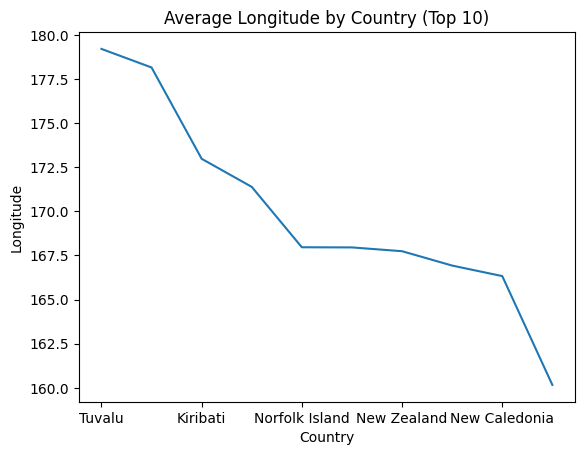

In [83]:
df.groupby("country")["lng"].mean().nlargest(10).plot(kind="line")
plt.title("Average Longitude by Country (Top 10)")
plt.xlabel("Country")
plt.ylabel("Longitude")
plt.show()

In [84]:
#the top 5 cities with the highest latitude (most northern).
top_lat_cities = df.nlargest(5, "lat")[["city", "lat"]]
print(top_lat_cities)

               city      lat
47763          Nord  81.7166
47318  Longyearbyen  78.2167
47541       Qaanaaq  77.4667
47749    Savissivik  76.0194
47791  Zemlya Bunge  74.8983


In [85]:
#total number of unique countries represented in the dataset
unique_countries = df["country"].nunique()
print(f"Number of unique countries: {unique_countries}")

Number of unique countries: 242


In [86]:
#the city with the highest population value in the dataset
most_populated_city = df.loc[df["population"].idxmax()]
print("Most populated city:")
print(most_populated_city)

Most populated city:
city               Tokyo
city_ascii         Tokyo
lat               35.687
lng             139.7495
country            Japan
iso2                  JP
iso3                 JPN
admin_name         Tōkyō
capital          primary
population    37785000.0
id            1392685764
Name: 0, dtype: object


In [87]:
#how many cities are located in the Southern Hemisphere, based on latitude values
southern_cities_count = len(df[df["lat"] < 0])
print(f"Cities in Southern Hemisphere: {southern_cities_count}")


Cities in Southern Hemisphere: 6822


In [88]:
#how many cities are classified as either primary or administrative capitals
capital_cities_count = len(df[df["capital"].isin(["primary", "admin"])])
print(f"Number of capital cities: {capital_cities_count}")

Number of capital cities: 3890


In [89]:
#the top three countries with the highest total population across all their cities
top_countries_by_population = df.groupby("country")["population"].sum().nlargest(3)
print("Top 3 countries by total population:")
print(top_countries_by_population)

Top 3 countries by total population:
country
China            1.375137e+09
India            5.150563e+08
United States    3.794267e+08
Name: population, dtype: float64


In [90]:
# lists cities whose names begin with the letter 'A'
cities_starting_with_a = df[df["city"].str.startswith("A")]
print(f"Cities starting with 'A': {len(cities_starting_with_a)}")
print(cities_starting_with_a[["city", "country"]].head())

Cities starting with 'A': 3099
            city        country
58     Ahmedabad          India
93        Ankara         Turkey
101  Addis Ababa       Ethiopia
121      Atlanta  United States
129      Abidjan  Côte d’Ivoire


In [91]:
#average population across all cities in the dataset
avg_population = df["population"].mean()
print(f"Average population across all cities: {avg_population:.0f}")

Average population across all cities: 108053


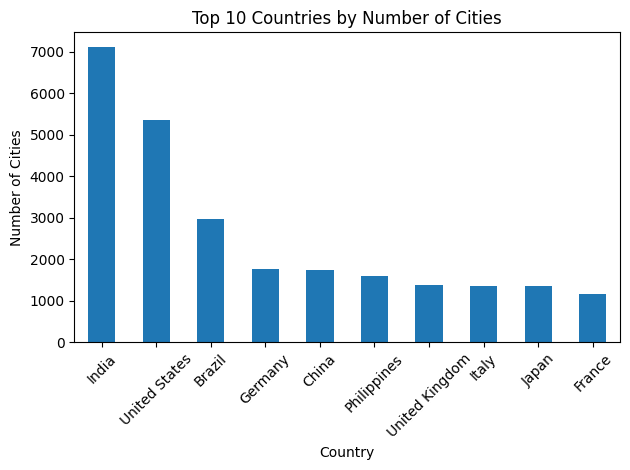

In [92]:
df["country"].value_counts().nlargest(10).plot(kind="bar")
plt.title("Top 10 Countries by Number of Cities")
plt.xlabel("Country")
plt.ylabel("Number of Cities")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

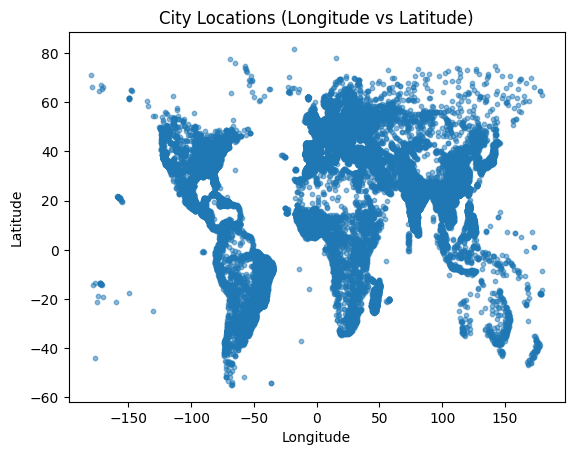

In [93]:
plt.scatter(df["lng"], df["lat"], alpha=0.5, s=10)
plt.title("City Locations (Longitude vs Latitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()